In [24]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.float_format', str)

In [31]:
df = pd.read_csv('data/kc_house_data_cleaned.csv')

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,2,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,2,7,2170,400,1951,1991.0,98125,47.721000000000004,-122.319,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0,0,2,6,770,0,1933,0.0,98028,47.7379,-122.23299999999999,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0,0,4,7,1050,910,1965,0.0,98136,47.5208,-122.39299999999999,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0,0,2,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [37]:
df_comp.head()

,price,sqft_living,sqft_lot,sqft_above,bedrooms,bathrooms,floors,grade,condition,view,...,BR/BTH,FAR,yard,Living_Space_VS_Bedroom,yr_built,yr_renovated,yr_built_pd,renovated,yr_renovated_pd,built_and_renovated
0,221900.0,1180,5650,1180,3,1.0,1.0,7,2,0,...,3.0,0.2088495575221239,4470.0,393.33333333333326,1955,0.0,6,0,1,60
1,538000.0,2570,7242,2170,3,2.25,2.0,7,2,0,...,1.3333333333333333,0.3548743441038387,6157.0,723.3333333333335,1951,1991.0,6,1,8,18
2,180000.0,770,10000,770,2,1.0,1.0,6,2,0,...,2.0,0.077,9230.0,385.0,1933,0.0,4,0,1,40
3,604000.0,1960,5000,1050,4,3.0,1.0,7,4,0,...,1.3333333333333333,0.392,3950.0,262.5,1965,0.0,7,0,1,70
4,510000.0,1680,8080,1680,3,2.0,1.0,8,2,0,...,1.5,0.2079207920792079,6400.0,560.0,1987,0.0,9,0,1,90


# Baseline Model

In [5]:
col_selector = ['price','sqft_living','grade','view','bedrooms','bathrooms']
df_base = df[col_selector]

In [6]:
y = df_base.price
X = df_base.drop(columns = ['price'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [8]:
ss = StandardScaler()
X_trans_train = ss.fit_transform(X_train)
X_trans_test = ss.transform(X_test)

In [9]:
model = sm.OLS(y_train, sm.add_constant(X_trans_train))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     4060.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:49:12   Log-Likelihood:            -2.0886e+05
No. Observations:               15117   AIC:                         4.177e+05
Df Residuals:                   15111   BIC:                         4.178e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.409e+05   1970.481    274.522      0.0

In [13]:
lr_base = LinearRegression()
lr_base.fit(X_trans_train, y_train)
print(lr_base.coef_, lr_base.intercept_)

[195683.25427549 102808.47863503  69266.25026648 -33098.66841492
 -18161.34110673] 540940.3749421182


In [29]:
X_train.columns

Index(['sqft_living', 'grade', 'view', 'bedrooms', 'bathrooms'], dtype='object')

In [16]:
# double check the r

lr_base.score(X_trans_train, y_train)

0.5732750834343969

In [18]:
y_base_predict = lr_base.predict(X_trans_test)

In [21]:
MAE = mean_absolute_error(y_base_predict, y_test)
MAE

155077.70867954663

In [25]:
RMSE = np.sqrt(mean_squared_error(y_base_predict, y_test))
RMSE

230329.8150078836

***CONCLUSION***

the base mode got R2 at 0.573

# POSSIBLE FEATURES

***Location and neighborhood***
Popular zip code by range
View

***Living***
floors
Bathroom/bedroom ratio
Bathroom/floor ratio
Bathroom by year built range?

***Investment***
House value increasing rate
Condition + grade
Yard
FAR
Old house + renovated
Old house

***Extra***
Flood zone and disaster
Crime and safety

# COMPLEX MODEL 1

In [169]:
df_comp = pd.read_csv('data_han/df_for_model_1.csv')

In [170]:
df_comp.shape

(21597, 22)

In [171]:
col_selector = ['sqft_living', 'sqft_lot', 'sqft_above', 'bedrooms',
       'bathrooms', 'floors', 'grade', 'condition', 'view', 'waterfront',
       'sqft_basement', 'BR/BTH', 'FAR', 'yard', 'Living_Space_VS_Bedroom',
       'yr_built', 'yr_renovated', 'yr_built_pd', 'renovated',
       'yr_renovated_pd', 'built_and_renovated']
X = df_comp[col_selector]
y = df_comp.price

col_selector = ['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement', 'FAR', 'yard', 'Living_Space_VS_Bedroom',
       'yr_built', 'yr_renovated', 'yr_built_pd',
       'yr_renovated_pd', 'built_and_renovated']

X = X.apply(lambda x: (x-x.mean())/ x.std())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [172]:
ss = StandardScaler()
X_trans_train = ss.fit_transform(X_train)
X_trans_test = ss.transform(X_test)

In [174]:
model = sm.OLS(y_train, sm.add_constant(X_trans_train))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     1478.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:36:24   Log-Likelihood:            -2.0662e+05
No. Observations:               15117   AIC:                         4.133e+05
Df Residuals:                   15095   BIC:                         4.135e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.384e+05   1699.510    316.803      0.0

In [173]:
pd.DataFrame(np.arange(0,22,1),df_comp.columns)

,0
price,0
sqft_living,1
sqft_lot,2
sqft_above,3
bedrooms,4
bathrooms,5
floors,6
grade,7
condition,8
view,9


<AxesSubplot:>

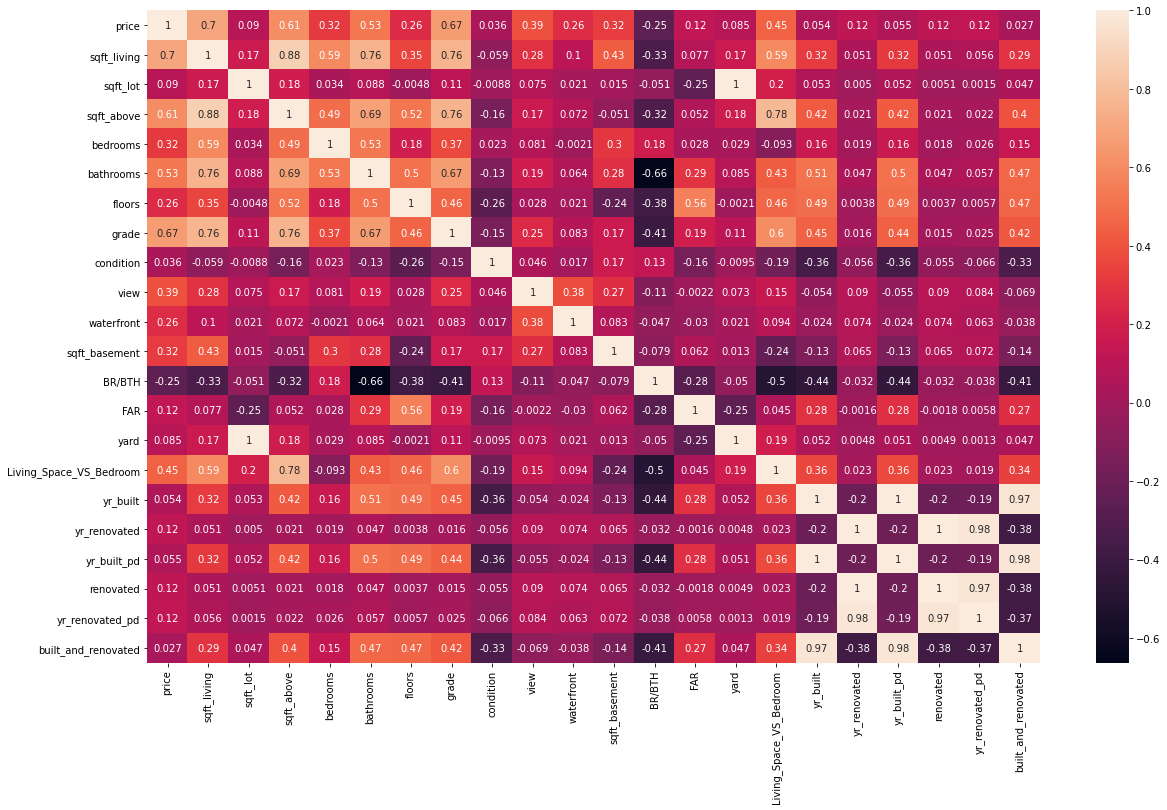

In [143]:
fig,ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_comp.corr(),annot=True,ax=ax)

***conclusion***
* not significant
 * lot size
 * floors, try **floor+lot OR living**
 * basement
 * yard **try living/lot**
 * yr_renovated
 * yr_renovated_pd
 

* working engineered features
 * BR/BTH
 * FAR
 * built_and_renovated
 
* Others
 * bin yr... less

# COMPLEX MODEL 2

In [176]:
df_comp = pd.read_csv('data_han/df_for_model_2.csv')

In [177]:
df_comp.shape

(21597, 24)

In [178]:
df_comp.head()

,price,sqft_living,sqft_above,bedrooms,bathrooms,grade,condition,view,waterfront,BR/BTH,...,living_per_lot,yr_built,yr_renovated,yr_built_pd,renovated,yr_renovated_pd,built_and_renovated,avg_price_zipcode,avg_sqft_living,pop_zip
0,221900.0,1180,1180,3,1.0,7,2,0,0,3.0,...,0.21,1955,0.0,6,0,1,60,310612.7557251909,1729.351145038168,2
1,538000.0,2570,2170,3,2.25,7,2,0,0,1.33,...,0.3,1951,1991.0,6,1,8,18,469928.76772616134,1746.2787286063572,3
2,180000.0,770,770,2,1.0,6,2,0,0,2.0,...,0.08,1933,0.0,4,0,1,40,462488.86925795046,2122.7243816254418,3
3,604000.0,1960,1050,4,3.0,7,4,0,0,1.33,...,0.21,1965,0.0,7,0,1,70,551768.5209125475,1726.828897338403,3
4,510000.0,1680,1680,3,2.0,8,2,0,0,1.5,...,0.21,1987,0.0,9,0,1,90,685675.8435374149,2645.8707482993195,4


In [158]:
X = df_comp.drop(columns = ['price'])
y = df_comp.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [159]:
ss = StandardScaler()
X_trans_train = ss.fit_transform(X_train)
X_trans_test = ss.transform(X_test)

In [175]:
pd.DataFrame(X_train)

,sqft_living,sqft_lot,sqft_above,bedrooms,bathrooms,floors,grade,condition,view,waterfront,...,BR/BTH,FAR,yard,Living_Space_VS_Bedroom,yr_built,yr_renovated,yr_built_pd,renovated,yr_renovated_pd,built_and_renovated
15029,-0.5449499100262951,-0.06880529653405332,-0.25200166997789636,-0.4112514168880826,0.49958592068111524,0.9374091710531393,0.2915825492814245,-0.62997185169746,-0.3049416711924256,-0.08249784454554307,...,-0.8433816917766778,-0.7255303845643898,-0.05800923266235166,-0.05217369756405737,0.7489412346434307,-0.18887671551505464,0.8337346856789967,-0.18888268227323415,-0.18388781197223675,0.8301674686678319
3891,-1.133117209261881,-0.19799291663377291,-0.9043648619748215,-1.517328235136142,-1.4510390875658492,-0.9155311426238378,-0.5607872824498853,0.9071993245662442,-0.3049416711924256,-0.08249784454554307,...,0.3808879568014699,-0.6445311726011814,-0.19353467818669323,-0.08466153761668545,-1.9063567503301688,-0.18887671551505464,-1.8720778892759093,-0.18888268227323415,-0.18388781197223675,-1.7495305309356504
18812,-0.1528383772025711,0.9817436006731243,0.18290712468672038,-0.4112514168880826,-0.15062241540120627,-0.9155311426238378,1.1439523810127343,2.4443705008299483,-0.3049416711924256,-0.08249784454554307,...,-0.38428057355987233,-1.0763653004260285,0.9670471549499717,0.5326074233832515,-0.578707757843369,-0.18887671551505464,-0.5191716017984563,-0.18888268227323415,-0.18388781197223675,-0.45968153113390925
19747,0.7076285976050454,-0.22680054855507487,0.2553919237974898,0.6948254013599768,1.8000025928457581,0.9374091710531393,0.2915825492814245,-0.62997185169746,-0.3049416711924256,-0.08249784454554307,...,-0.930829523817974,0.5758938827717083,-0.22143839938125856,-0.18212505777457025,1.3617023080988768,-0.18887671551505464,1.5101878294177233,-0.18888268227323415,-0.18388781197223675,1.4750919685687025
19738,-0.32166417605723,-0.30298502358584406,-0.0043452730161007225,0.6948254013599768,0.49958592068111524,0.9374091710531393,0.2915825492814245,-0.62997185169746,-0.3049416711924256,-0.08249784454554307,...,-0.23124686748760373,1.3994487073335842,-0.2951908628161569,-0.44405826819888566,1.293617744381605,-0.18887671551505464,1.17196125754836,-0.18888268227323415,-0.18388781197223675,1.1526297186182672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13052,0.8274404548567388,-0.243872632183206,-0.20367847057071672,1.8009022196080362,0.49958592068111524,-0.9155311426238378,-0.5607872824498853,0.9071993245662442,-0.3049416711924256,-0.08249784454554307,...,0.3808879568014699,0.9097987543763736,-0.2535530897760445,-1.0398040351639566,-1.9744413140474406,-0.18887671551505464,-1.8720778892759093,-0.18888268227323415,-0.18388781197223675,-1.7495305309356504
14050,0.489788857147421,-0.243872632183206,-0.11911287160815236,0.6948254013599768,0.17448175263995447,0.010939014214650709,-0.5607872824498853,0.9071993245662442,-0.3049416711924256,-0.08249784454554307,...,0.04081305441865099,0.6788518445538543,-0.2416139433846144,-0.5597961983863738,-1.56593393174381,-0.18887671551505464,-1.533851317406546,-0.18888268227323415,-0.18388781197223675,-1.427068280985215
4961,0.8339756470704676,1.697008366088787,0.22639800415318204,0.6948254013599768,0.49958592068111524,0.010939014214650709,0.2915825492814245,-0.62997185169746,-0.3049416711924256,-0.08249784454554307,...,-0.23124686748760373,-1.0818035673862876,1.698973297680272,-0.2113641138219357,0.9872372076538819,-0.18887671551505464,0.8337346856789967,-0.18888268227323415,-0.18388781197223675,0.8301674686678319
12639,0.8274404548567388,-0.04183285323472869,-0.4452944676066149,0.6948254013599768,-0.15062241540120627,-0.9155311426238378,-0.5607872824498853,-0.62997185169746,-0.3049416711924256,-0.08249784454554307,...,0.3808879568014699,-0.41455687741242203,-0.04622335909621696,-0.8887355789192352,-0.6467923215606408,-0.18887671551505464,-0.5191716017984563,-0.18888268227323415,-0.18388781197223675,-0.45968153113390925


In [160]:
model = sm.OLS(y_train, sm.add_constant(X_trans_train))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     2857.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:25:52   Log-Likelihood:            -2.0249e+05
No. Observations:               15117   AIC:                         4.050e+05
Df Residuals:                   15093   BIC:                         4.052e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.392e+05   1293.215    416.940      0.0

In [161]:
pd.DataFrame(np.arange(0,24,1),df_comp.columns)


,0
price,0
sqft_living,1
sqft_above,2
bedrooms,3
bathrooms,4
grade,5
condition,6
view,7
waterfront,8
BR/BTH,9


***conclusion***

drop: 13 17 19 20 23 
living_per_floor, yr_built_pd, yr_renovated_pd, built_and_renovated, pop_zip

??? conflict with previous one ???